In [1]:
import os

import numpy as np
import pandas as pd
import time
pd.options.mode.chained_assignment = None
import math
import numpy as np
import copy
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('TexasHarrisConsumption60.csv')
data['weekday'] = [datetime.strptime(data['TimeStamp'].iloc[i], "%Y-%m-%d  %H:%M:%S").weekday()+1 for i in range(len(data))]
entries = data.columns[1:-1]
data['aggregation'] = sum(data[entry] for entry in entries)

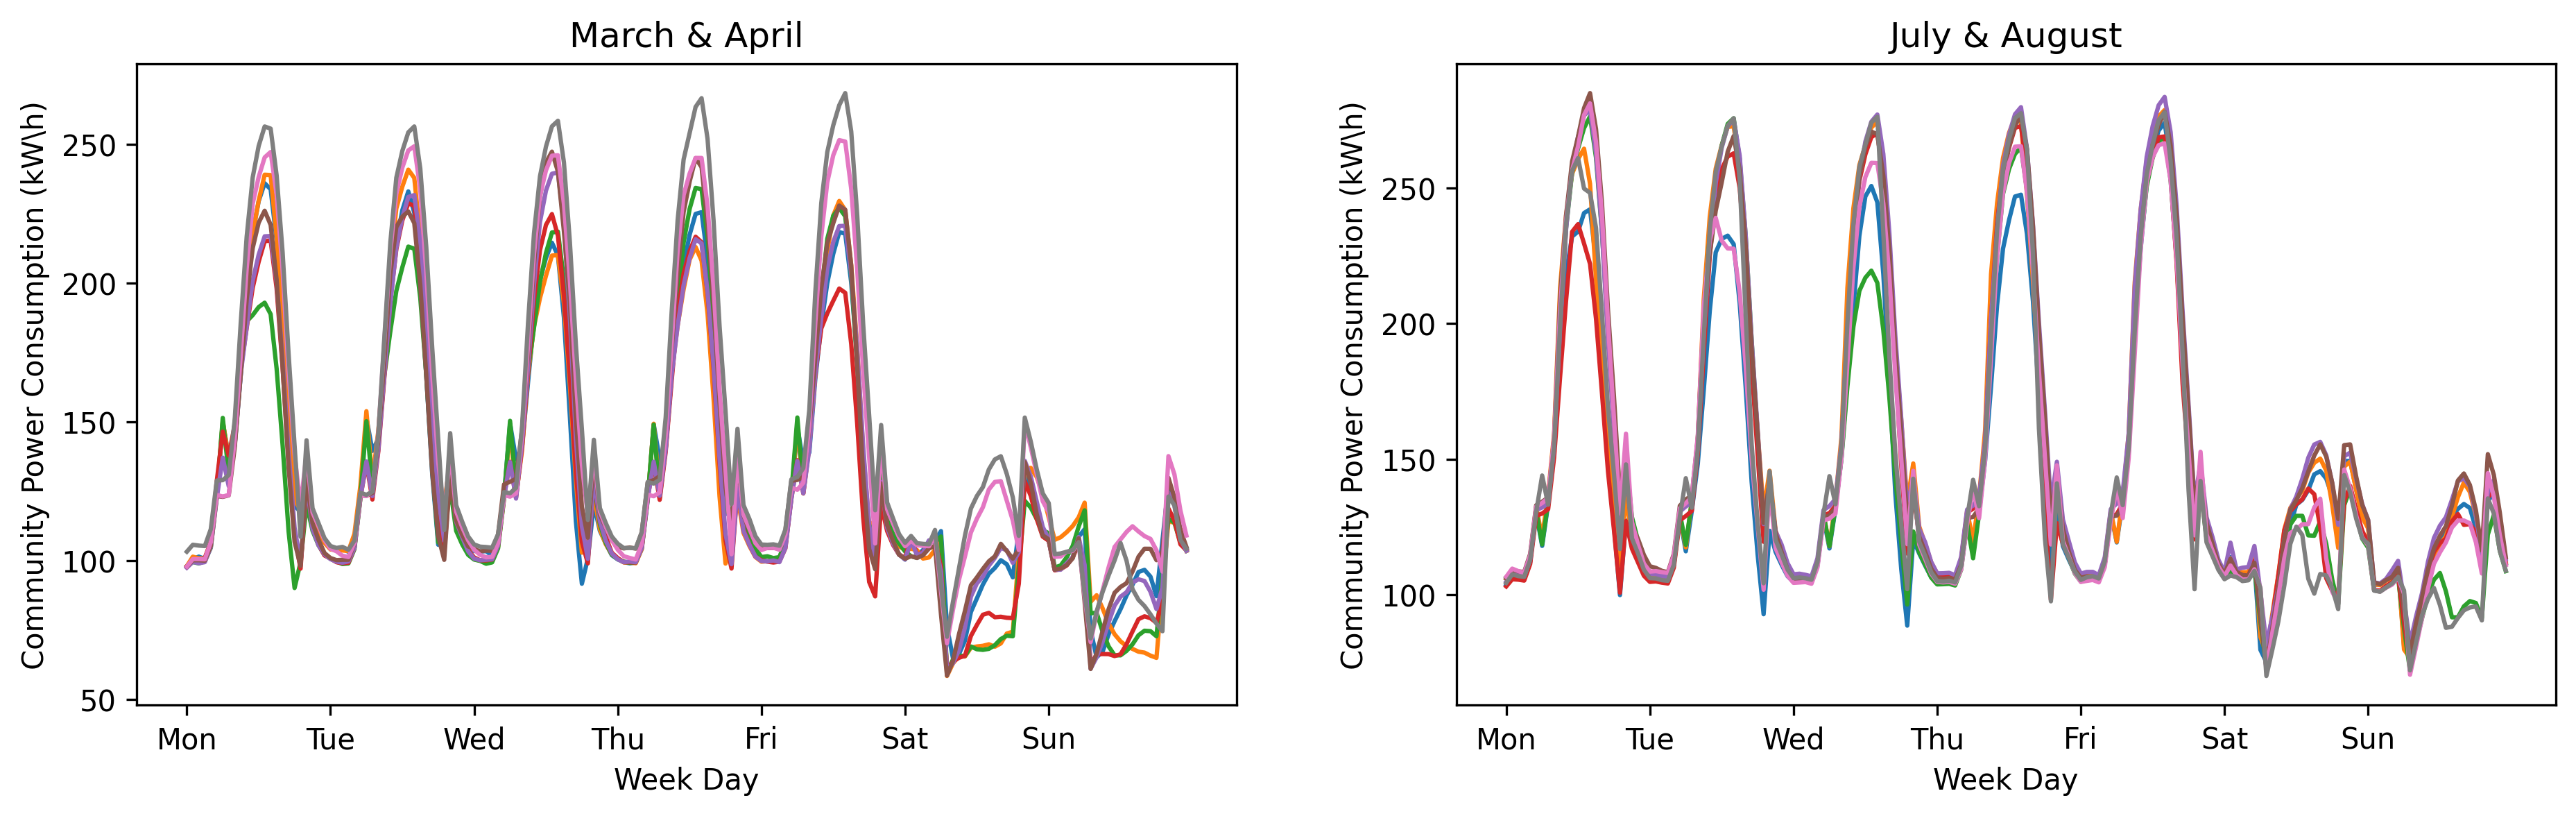

In [206]:
fig, axs = plt.subplots(1, 2, figsize=(15, 4), dpi=300)
h = 168
c = 8
for d in range(c):
    axs[0].plot(range(h), data['aggregation'].iloc[(d + 3*4)*h: (d+1 + 3*4)*h])
for d in range(c):
    axs[1].plot(range(h), data['aggregation'].iloc[(d + 6*4)*h: (d+1 + 6*4)*h])

axs[0].set_title('March & April')
axs[1].set_title('July & August')

axs[0].set_xticks([24*i for i in range(7)], ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
axs[1].set_xticks([24*i for i in range(7)], ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

axs[0].set_xlabel('Week Day')
axs[0].set_ylabel('Community Power Consumption (kW\h)')

axs[1].set_xlabel('Week Day')
axs[1].set_ylabel('Community Power Consumption (kW\h)')

plt.savefig('IMG/MarApr-JulAug.jpg', bbox_inches='tight')

### Months Separation

In [3]:
'''Jan and Feb'''
Start = 0
JF = 31 + 29
JanFeb = pd.DataFrame(index=range(24))
truncated = data.iloc[Start * 24:JF * 24]
weekday = truncated[truncated['weekday'] < 6]
weekend = truncated[truncated['weekday'] >= 6]
wd = range(int(len(weekday)/24))
we = range(int(len(weekend)/24))
JanFeb = pd.DataFrame(index=range(24), columns=[f'weekday{j}' for j in wd] + [f'weekend{j}' for j in we])
for j in range(int(len(weekday)/24)):
    JanFeb[f'weekday{j}'] = weekday['aggregation'].iloc[j*24 : (j+1)*24].values
for j in range(int(len(weekend)/24)):
    JanFeb[f'weekend{j}'] = weekend['aggregation'].iloc[j*24 : (j+1)*24].values
Start += JF
JanFeb.to_csv('JanFeb.csv')

'''Mar and Apr'''
MA = 31 + 30
truncated = data.iloc[Start * 24:(Start + MA) * 24]
weekday = truncated[truncated['weekday'] < 6]
weekend = truncated[truncated['weekday'] >= 6]
wd = range(int(len(weekday)/24))
we = range(int(len(weekend)/24))
MarApr = pd.DataFrame(index=range(24), columns=[f'weekday{j}' for j in wd] + [f'weekend{j}' for j in we])
for j in wd:
    MarApr[f'weekday{j}'] = weekday['aggregation'].iloc[j*24 : (j+1)*24].values
for j in we:
    MarApr[f'weekend{j}'] = weekend['aggregation'].iloc[j*24 : (j+1)*24].values
Start += MA
MarApr.to_csv('MarApr.csv')

'''May and Jun'''
MJ = 31 + 30
truncated = data.iloc[Start * 24:(Start + MJ) * 24]
weekday = truncated[truncated['weekday'] < 6]
weekend = truncated[truncated['weekday'] >= 6]
wd = range(int(len(weekday)/24))
we = range(int(len(weekend)/24))
MayJun = pd.DataFrame(index=range(24), columns=[f'weekday{j}' for j in wd] + [f'weekend{j}' for j in we])
for j in wd:
    MayJun[f'weekday{j}'] = copy.copy(weekday['aggregation'].iloc[j*24 : (j+1)*24].values)
for j in we:
    MayJun[f'weekend{j}'] = copy.copy(weekend['aggregation'].iloc[j*24 : (j+1)*24].values)
Start += MJ
MayJun.to_csv('MayJun.csv')

'''Jul and Aug'''
JA = 31 + 31
truncated = data.iloc[Start * 24:(Start + JA) * 24]
weekday = truncated[truncated['weekday'] < 6]
weekend = truncated[truncated['weekday'] >= 6]
wd = range(int(len(weekday)/24))
we = range(int(len(weekend)/24))
JulAug = pd.DataFrame(index=range(24), columns=[f'weekday{j}' for j in wd] + [f'weekend{j}' for j in we])
for j in wd:
    JulAug[f'weekday{j}'] = copy.copy(weekday['aggregation'].iloc[j*24 : (j+1)*24].values)
for j in we:
    JulAug[f'weekend{j}'] = copy.copy(weekend['aggregation'].iloc[j*24 : (j+1)*24].values)
Start += JA
JulAug.to_csv('JulAug.csv')

'''Sep and Oct'''
SO = 30 + 31
truncated = data.iloc[Start * 24:(Start + JA) * 24]
weekday = truncated[truncated['weekday'] < 6]
weekend = truncated[truncated['weekday'] >= 6]
wd = range(int(len(weekday)/24))
we = range(int(len(weekend)/24))
SepOct = pd.DataFrame(index=range(24), columns=[f'weekday{j}' for j in wd] + [f'weekend{j}' for j in we])
for j in wd:
    SepOct[f'weekday{j}'] = copy.copy(weekday['aggregation'].iloc[j*24 : (j+1)*24].values)
for j in we:
    SepOct[f'weekend{j}'] = copy.copy(weekend['aggregation'].iloc[j*24 : (j+1)*24].values)
Start += SO
SepOct.to_csv('SepOct.csv')

'''Nov and Dec'''
ND = 30 + 31
truncated = data.iloc[Start * 24:(Start + JA) * 24]
weekday = truncated[truncated['weekday'] < 6]
weekend = truncated[truncated['weekday'] >= 6]
wd = range(int(len(weekday)/24))
we = range(int(len(weekend)/24))
NovDec = pd.DataFrame(index=range(24), columns=[f'weekday{j}' for j in wd] + [f'weekend{j}' for j in we])
for j in wd:
    NovDec[f'weekday{j}'] = copy.copy(weekday['aggregation'].iloc[j*24 : (j+1)*24].values)
for j in we:
    NovDec[f'weekend{j}'] = copy.copy(weekend['aggregation'].iloc[j*24 : (j+1)*24].values)
NovDec.to_csv('NovDec.csv')

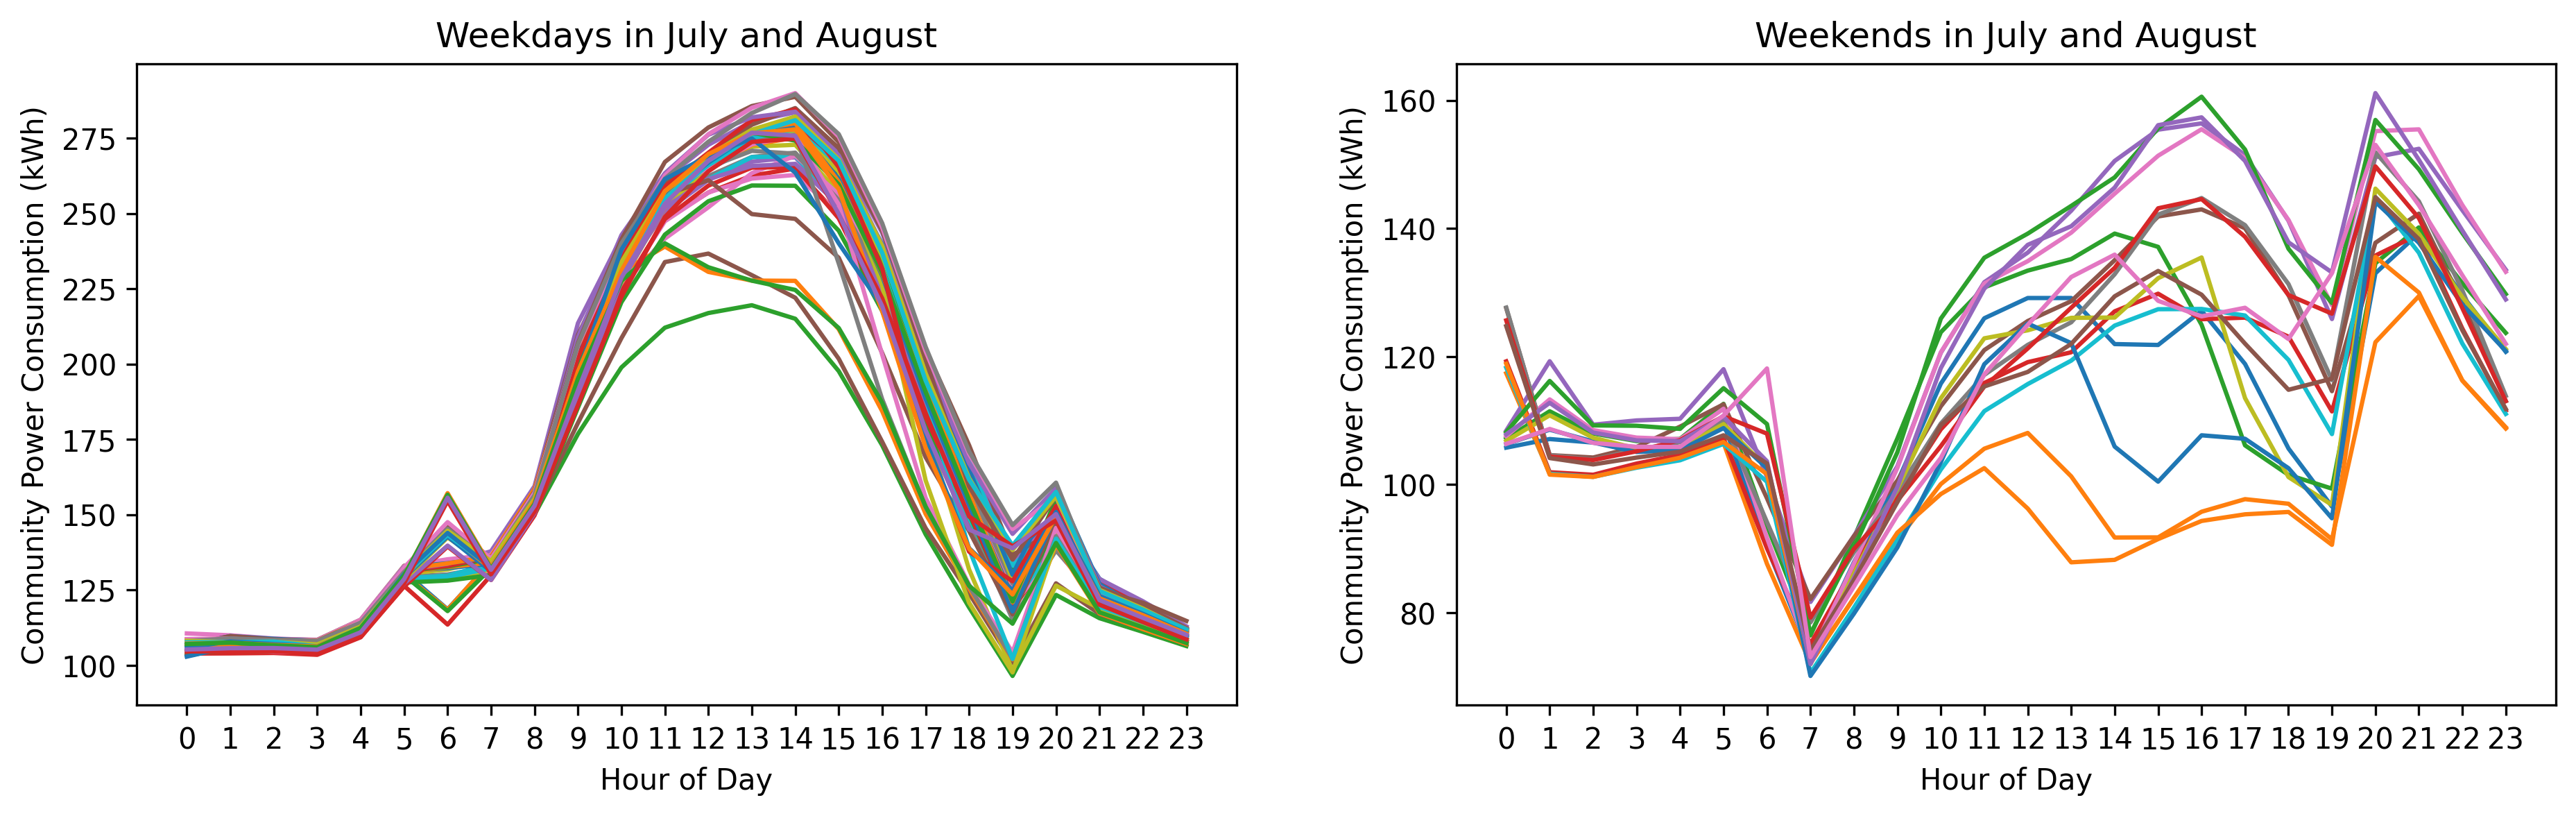

In [207]:
fig, axs = plt.subplots(1, 2, figsize=(15, 4), dpi=300)
for j in JulAug.columns:
    if 'weekday' in j:
        axs[0].plot(range(24), JulAug[j])
    else:
        axs[1].plot(range(24), JulAug[j])

axs[0].set_title('Weekdays in July and August')
axs[1].set_title('Weekends in July and August')

axs[0].set_xlabel('Hour of Day')
axs[1].set_xlabel('Hour of Day')

axs[0].set_ylabel('Community Power Consumption (kWh)')
axs[1].set_ylabel('Community Power Consumption (kWh)')

axs[0].set_xticks(range(24))
axs[1].set_xticks(range(24))
plt.savefig('IMG/Weekday-Weekend-JulAug.jpg', bbox_inches='tight')